# 미니프로젝트 개요-Case1

#### 작성자
#### 작성일

그래픽 한글 처리

In [ ]:
!apt-get install -y fonts-nanum

In [ ]:
!fc-cache -fv

In [ ]:
!rm ~/.cache/matplotlib -rf

In [95]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 1.Gathering Data

### https://pythondojang.bitbucket.io/weather/observation/currentweather.html 에서 도시별 현재날씨 확인하기

In [61]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈
 
# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            weather = tds[1].text # 날씨 
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, weather, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가
 
data    # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨

[['서울', '맑음', '25.6', '30'],
 ['백령도', '구름조금', '18.4', '62'],
 ['인천', '맑음', '20.8', '54'],
 ['수원', '구름조금', '25.0', '41'],
 ['동두천', '\xa0', '24.9', '34'],
 ['파주', '\xa0', '25.1', '39'],
 ['강화', '\xa0', '20.0', '56'],
 ['양평', '\xa0', '25.5', '32'],
 ['이천', '\xa0', '25.6', '28'],
 ['북춘천', '구름조금', '24.6', '36'],
 ['북강릉', '맑음', '19.9', '56'],
 ['울릉도', '구름많음', '16.8', '77'],
 ['속초', '\xa0', '19.1', '75'],
 ['철원', '\xa0', '23.9', '37'],
 ['대관령', '\xa0', '17.9', '49'],
 ['춘천', '\xa0', '25.7', '39'],
 ['강릉', '\xa0', '22.7', '41'],
 ['동해', '\xa0', '19.5', '77'],
 ['원주', '\xa0', '23.4', '36'],
 ['영월', '\xa0', '24.2', '34'],
 ['인제', '\xa0', '24.3', '31'],
 ['홍천', '\xa0', '25.4', '25'],
 ['태백', '\xa0', '19.6', '43'],
 ['정선군', '\xa0', '23.0', '32'],
 ['서산', '맑음', '23.6', '49'],
 ['청주', '구름조금', '24.3', '33'],
 ['대전', '맑음', '25.1', '37'],
 ['충주', '\xa0', '24.4', '32'],
 ['추풍령', '\xa0', '23.0', '35'],
 ['홍성(예)', '\xa0', '24.3', '46'],
 ['제천', '\xa0', '24.2', '32'],
 ['보은', '\xa0', '23.7', '28'],
 ['천안',

### 데이터를 csv 파일에 저장

In [63]:
import pandas as pd

cn=['지점','현재일기','현재기온','습도']
w_list=pd.DataFrame(data, columns=cn)
w_list

,지점,현재일기,현재기온,습도
0,서울,맑음,25.6,30
1,백령도,구름조금,18.4,62
2,인천,맑음,20.8,54
3,수원,구름조금,25.0,41
4,동두천,,24.9,34
...,...,...,...,...
90,합천,,25.1,32
91,밀양,,24.7,34
92,산청,,24.8,41
93,거제,,23.1,57


In [64]:
w_list.to_csv('Test.csv',encoding='utf-8-sig') #utf-8로 한글 저장 잘 됨

w_list.to_csv('Test.csv',encoding='euc-kr') #한글 저장 잘 됨

w_list.to_csv('Test.csv',encoding='utf-8') #한글 깨짐

### csv 파일 불러오기

In [65]:
import pandas as pd

In [66]:
weather=pd.read_csv('Test.csv')
weather.head()

,Unnamed: 0,지점,현재일기,현재기온,습도
0,0,서울,맑음,25.6,30
1,1,백령도,구름조금,18.4,62
2,2,인천,맑음,20.8,54
3,3,수원,구름조금,25.0,41
4,4,동두천,,24.9,34


### 열이름 변경

In [67]:
weather=weather.rename(
    {'Unnamed: 0':'순번'},axis='columns'
)

In [68]:
weather.head()

,순번,지점,현재일기,현재기온,습도
0,0,서울,맑음,25.6,30
1,1,백령도,구름조금,18.4,62
2,2,인천,맑음,20.8,54
3,3,수원,구름조금,25.0,41
4,4,동두천,,24.9,34


#### 열 위치 변경

In [71]:
weather=weather[['순번', '지점', '현재기온', '습도', '현재일기']]
weather

,순번,지점,현재기온,습도,현재일기
0,0,서울,25.6,30,맑음
1,1,백령도,18.4,62,구름조금
2,2,인천,20.8,54,맑음
3,3,수원,25.0,41,구름조금
4,4,동두천,24.9,34,
...,...,...,...,...,...
90,90,합천,25.1,32,
91,91,밀양,24.7,34,
92,92,산청,24.8,41,
93,93,거제,23.1,57,


## 2. 이상치 결측치 확인

In [72]:
print("행, 열 : ", weather.shape)

행, 열 :  (95, 5)


#### 결측치 확인

X에 대한 결측치 확인

In [82]:
X_null=weather.iloc[:,1:4].isnull().sum()

In [83]:
if X_null.sum()==0:
    print("결측치가 없습니다.\n")
else:
    print("결측치가 있습니다.\n")
    print(X_null,"\n")

결측치가 없습니다.



y에 대한 결측치 확인

In [84]:
y_null=weather.iloc[:,4:].isnull

In [85]:
if y_null==0:
    print("결측치가 없습니다.\n")
else:
    print("결측치가 있습니다.\n")
    print(y_null,"\n")

결측치가 있습니다.

<bound method DataFrame.isnull of     현재일기
0     맑음
1   구름조금
2     맑음
3   구름조금
4       
..   ...
90      
91      
92      
93      
94      

[95 rows x 1 columns]> 



#### 이상치 확인은 해 보시길 바랄게요!!!

<AxesSubplot:>

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


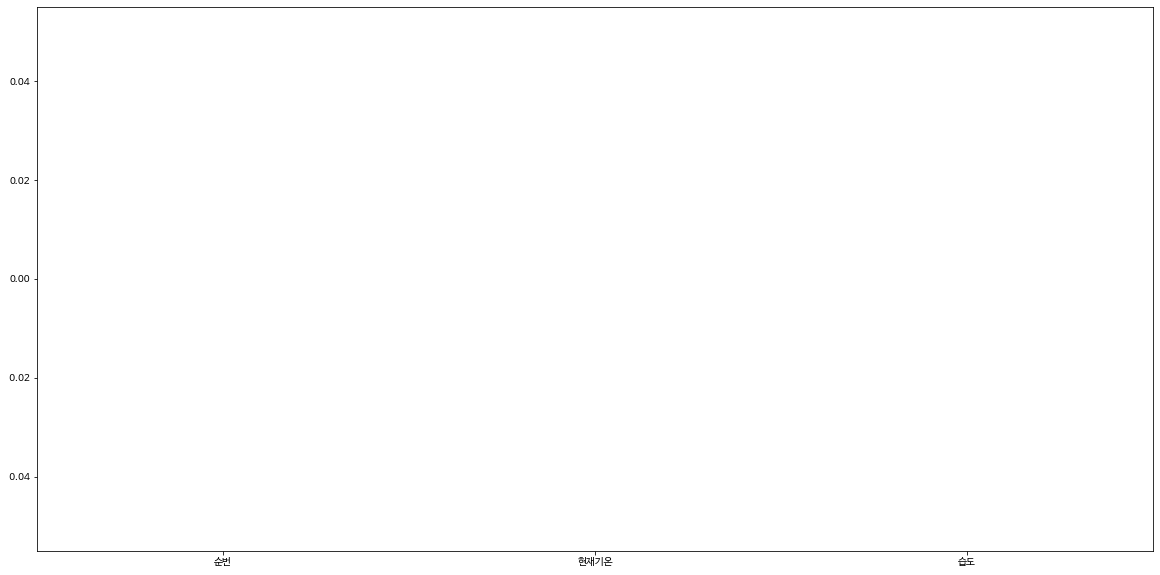

In [97]:
weather.loc[:-1].plot.box(figsize=(20,10))

## 3. EDA 상관분석

In [88]:
corr=weather[:-1].corr()

<AxesSubplot:>

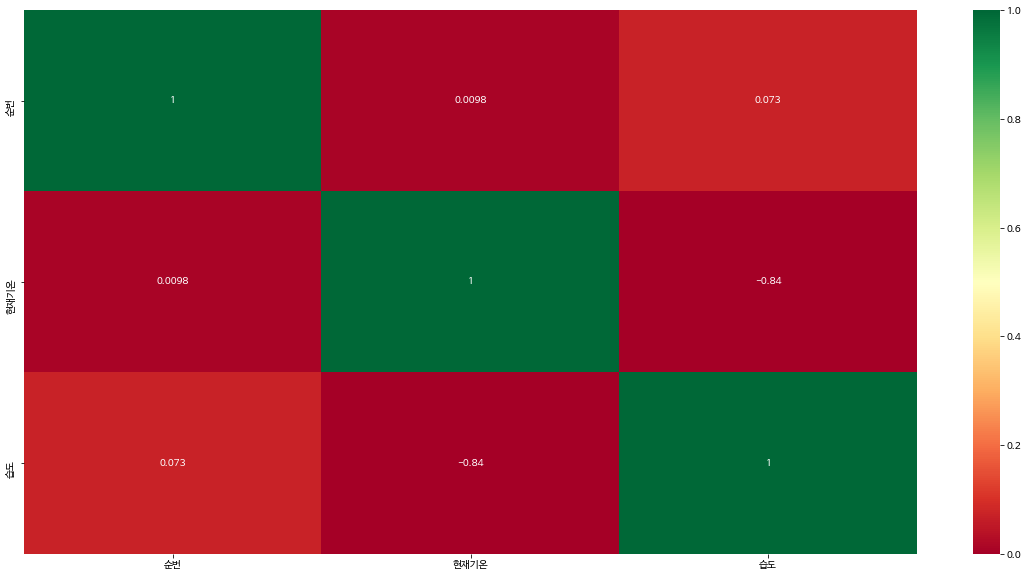

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

## 4. 특징 추출

(<AxesSubplot:title={'center':'현재기온'}>, Text(0.5, 1.0, '현재기온'))

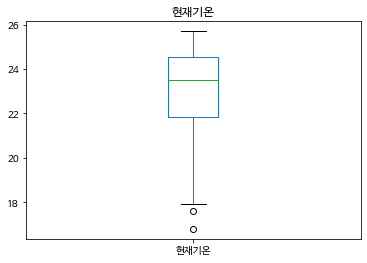

In [99]:
weather.loc[:,'현재기온'].plot.box(), plt.title("현재기온")

(<AxesSubplot:title={'center':'현재기온'}>, Text(0.5, 1.0, '현재기온'))

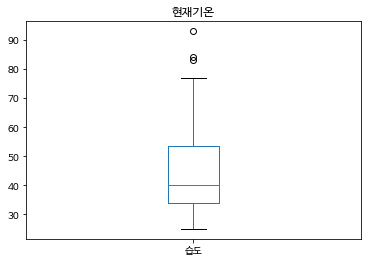

In [100]:
weather.loc[:,'습도'].plot.box(), plt.title("현재기온")